In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
mostrecentdate = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(mostrecentdate[0])

2017-08-23


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
mostrecent = dt.datetime.strptime(mostrecentdate[0], '%Y-%m-%d')


# Calculate the date one year from the last date in data set.
oneyearago= dt.date(mostrecent.year -1, mostrecent.month, mostrecent.day)
oneyearago

# Perform a query to retrieve the data and precipitation scores
data = [measurement.date,measurement.prcp]
dataquery = session.query(*data).filter(measurement.date >= oneyearago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip = pd.DataFrame(dataquery, columns=['Date', 'Precipitation']).set_index('Date')

# Sort the dataframe by date
precip = precip.sort_values(by='Date').dropna()

precip.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


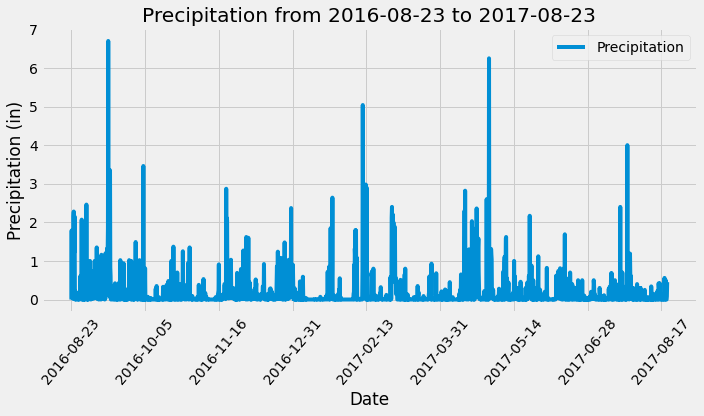

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
precip.plot(rot=50, figsize=(10,6))

# Add labels and legend
plt.title(f"Precipitation from {oneyearago} to {mostrecentdate[0]}")
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")
plt.legend(loc="upper right")
plt.tight_layout()

plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(station.id).count()

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(measurement.station,func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
session.query(func.min(measurement.tobs),
             func.max(measurement.tobs),
             func.avg(measurement.tobs)).filter(measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

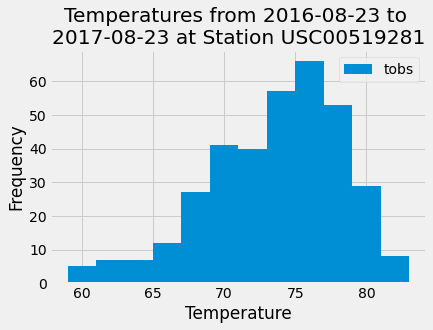

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data = session.query(measurement.date,measurement.tobs).\
                            filter(measurement.date >= oneyearago).\
                            filter(measurement.station == station_number).all()

# Save results as DataFrame
station_data_df = pd.DataFrame(station_data, columns=['Date', 'Temperature'])

temperatures = station_data_df['Temperature']

# Plot as histogram
plt.hist(temperatures, bins=12, label='tobs')

# Add labels and legend
plt.title(f"Temperatures from {oneyearago} to \n{mostrecentdate[0]} at Station {station_number}" )
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="upper right")

# Close session

In [20]:
# Close Session
session.close()